Tugas Besar Machine Learning tahap 1

*Clustering*

Deny Ahmad Sofyan

IF 43 10

# LIBRARY


> Menggunakan beberapa liblary penting agar proses Clustering dapat berjalan sesuai keinginan (tidak menggunakan library K-Means) 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from math import ceil
import random as rd
from copy import deepcopy 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.decomposition import PCA

#IMPORT DATASET

> Persiapan data sebagai bahan olahan proses Clustering dengan menggunakan dataset kendaraan_train bertipe CSV 



In [ ]:
url = 'https://raw.githubusercontent.com/Denyrcrc/Tubes-1-ML/main/kendaraan_train.csv'
dataset_train = pd.read_csv(url)

In [ ]:
dataset_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


#PREPROCESSING

> Persiapan dataset untuk langkah selanjutnya, persiapan seperti menghapus kolom yang tidak penting mencari missing value (null) dan mengatasi missing value  



##Penggunaan kolom penting

Menghapus kolom yang tidak penting terhadap proses Clustering. Disini kolom yang di hapus adalah:               


- id, dikarenakan sama dengan row CSV
- SIM dan Sudah_Asuransi, dikarenakan mempunyai value yang kurang variatif dan kurang berkorelasi
- tertarik, dikarenakan kolom tersebut adalah hasil dari sebuah proses


In [ ]:
dataset = dataset_train.drop(['id', 'SIM', 'Sudah_Asuransi','Tertarik'], axis=1)

In [ ]:
dataset

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,33.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,39.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,46.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,48.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,35.0,> 2 Tahun,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,4.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,46.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,50.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,7.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


##Cek missing value

cek dan menampilkan value null dari semua kolom pada file CSV

In [ ]:
dataset.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
Kode_Daerah          14306
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

##Handling mising value

men drop atau mengahapus row yang berisikan null pada row tersebut sehingga tidak ada data noise saat tahap selanjutnya

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

Jenis_Kelamin        0
Umur                 0
Kode_Daerah          0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

##Handling value non-numerical

menghapus value dari kolom yang berisi objek agar tidak adanya noise dan juga mengatasi kurang nya variasi data karena berisi value 0 sampai 1/2 membuat korelasi kurang maksimal dalam menentukan scalling

In [ ]:
filteredColumns = dataset.dtypes[dataset.dtypes == np.object]
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['Jenis_Kelamin', 'Umur_Kendaraan', 'Kendaraan_Rusak']


In [ ]:
for column in dataset:
  if dataset.dtypes[column] == np.object:
    newdataset = dataset.drop(listOfColumnNames, axis=1)
    print('Data type of column', column, 'is dropped')

Data type of column Jenis_Kelamin is dropped
Data type of column Umur_Kendaraan is dropped
Data type of column Kendaraan_Rusak is dropped


In [ ]:
newdataset

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
3,58.0,48.0,2630.0,124.0,63.0
5,21.0,35.0,22735.0,152.0,171.0
7,23.0,28.0,26869.0,152.0,222.0
...,...,...,...,...,...
285826,23.0,4.0,25988.0,152.0,217.0
285827,21.0,46.0,44686.0,152.0,50.0
285828,23.0,50.0,49751.0,152.0,226.0
285829,68.0,7.0,30503.0,124.0,270.0


In [ ]:
newdataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189699 entries, 0 to 285830
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               189699 non-null  float64
 1   Kode_Daerah        189699 non-null  float64
 2   Premi              189699 non-null  float64
 3   Kanal_Penjualan    189699 non-null  float64
 4   Lama_Berlangganan  189699 non-null  float64
dtypes: float64(5)
memory usage: 8.7 MB


##Check outliner

men check apakah ada data yang tidak wajar (tidak umum)

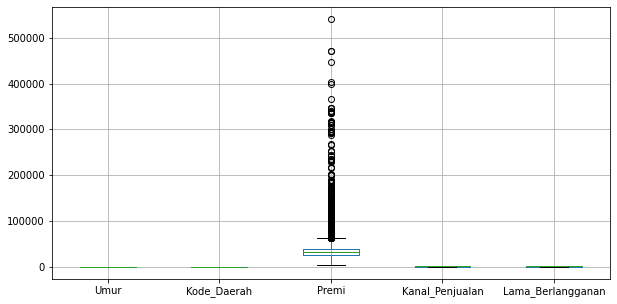

In [ ]:
newdataset.boxplot(figsize=[10,5])

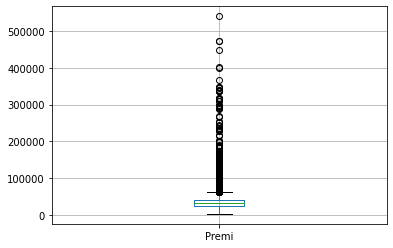

In [ ]:
boxplot = newdataset.boxplot(column=['Premi'])

##handling outliner

mengatasi data yang tidak wajar dengan menggunakan metode interquartile data

In [ ]:
def interquartile(newdataset,x):
  q1 = (newdataset[x]).quantile(0.25)
  q3 = (newdataset[x]).quantile(0.75) 
  iqr = q3 - q1 #range q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum
  
max,min = interquartile(newdataset,'Premi')
print('max: ',max,' | min:',min)

max:  61777.5  | min: 1925.5


above:  0         False
1         False
3         False
5         False
7         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 189699, dtype: bool  | below:  0         False
1         False
3         False
5         False
7         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 189699, dtype: bool


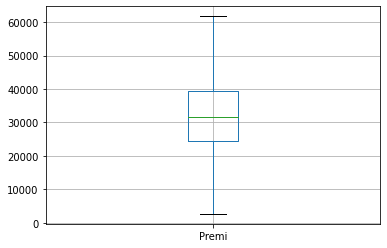

In [ ]:
def HandlingOutliner(newdata,x,max,min):
  above = (newdataset[x] > max)
  below = (newdataset[x] < min)
  print('above: ',above,' | below: ',below)
  newdataset[x] = newdataset[x].mask(above, max,axis=0)
  newdataset[x] = newdataset[x].mask(below, min,axis=0)
  return newdataset
  
max,min = interquartile(newdataset,'Premi')
newdataset = HandlingOutliner(newdataset,'Premi',max,min)
boxplot = newdataset.boxplot(column=['Premi'])

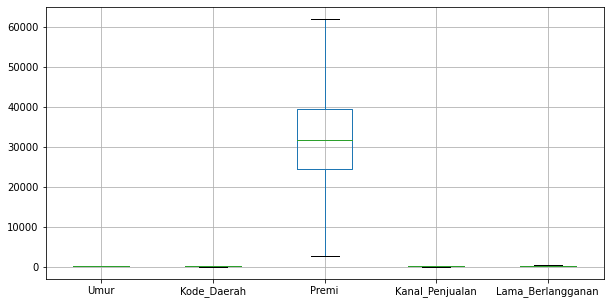

In [ ]:
newdataset.boxplot(figsize=[10,5])

##Scalling

Scaling dengan menggunakan StandardScaler, agar persebaran data setiap kolomnya tidak terlalu jauh dan angkanya masih bervariasi 

In [ ]:
scale = StandardScaler()
scale.fit(newdataset)
temp =scale.transform(newdataset)
newdatasetnew = pd.DataFrame(temp, index=newdataset.index, columns=newdataset.columns)
newdatasetnew


,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,-0.567639,0.495812,-0.134144,0.735019,-0.682865
1,0.591373,0.948087,-0.278290,-1.537184,0.044955
3,1.235269,1.626500,-1.776665,0.217770,-1.088534
5,-1.147145,0.646570,-0.476500,0.735019,0.200064
7,-1.018366,0.118916,-0.209159,0.735019,0.808569
...,...,...,...,...,...
285826,-1.018366,-1.690185,-0.266133,0.735019,0.748911
285827,-1.147145,1.475742,0.943044,0.735019,-1.243643
285828,-1.018366,1.777259,1.270591,0.735019,0.856294
285829,1.879164,-1.464048,0.025847,0.217770,1.381279


##Splitting

menggunakan PCA untuk mereduksi data menjadi 2 kolom untuk selanjutnya digunakan dalam clustering

In [ ]:
temp = MinMaxScaler().fit_transform(newdatasetnew)
newdatasetnew1 = pd.DataFrame(temp, index=newdatasetnew.index, columns=newdatasetnew.columns)

In [ ]:
pca = PCA(n_components=2)
datasetbaru = pca.fit_transform(newdatasetnew1)
datasetbaru = pd.DataFrame(data = datasetbaru, columns = ['x', 'y'])
datasetbaru

,x,y
0,-0.274482,-0.200329
1,0.513402,0.010798
2,0.037245,-0.320901
3,-0.353133,0.055236
4,-0.335913,0.233518
...,...,...
189694,-0.365450,0.222852
189695,-0.285205,-0.367017
189696,-0.253498,0.240691
189697,0.134709,0.405898


In [ ]:
arr = MinMaxScaler(feature_range=(0,10)).fit_transform(datasetbaru)
print(arr)

[[1.55789241 3.01175782]
 [6.93978333 5.08874955]
 [3.68724061 1.82561801]
 ...
 [1.70122935 7.35034366]
 [4.3529984  8.97558765]
 [6.99449621 1.23580055]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


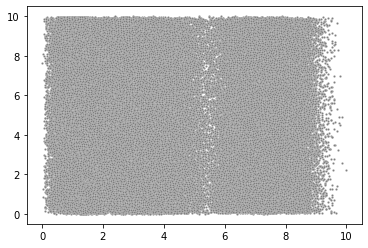

In [ ]:
x=arr[:,0]
y=arr[:,1]
sns.scatterplot(x, y, s=5, color='gray')

#PERMODELAN / CLUSTERING

> Pemrosesan data utama dalam Clustering setelah sebelumnya sudah melewati tahap Preprosesing data 



##Find jarak

Mencari jarak untuk centroid menggunakan metode Euclidian Distance

In [ ]:
def Euclidian(a, b, ax=1):
    sub = a-b
    hasil = np.linalg.norm(sub, axis=ax)
    return hasil

##Find centroid

Mencari centroid untuk menampung data kendaraan dengan merandom nilai minimum dan maksimum yang terdapat pada array

In [ ]:
k = 5
min = np.min(arr)
max = np.max(arr)

centroid1 = np.random.randint(min, max, size=k)
centroid2 = np.random.randint(min, max, size=k)
centroid = np.array(list(zip(centroid1, centroid2)))
print(centroid)

[[7 4]
 [8 7]
 [2 5]
 [9 9]
 [2 6]]


##K-Means

Melakukan centroid dengan menggunakan metode K-Means, membuat temparrcl untuk menampung hasil cluster dan temparrcen untuk menampung nilai centroid sebelumnya lalu array titik untuk menapung pengelompokan

In [ ]:
temparrcl = np.zeros(len(arr))
temparrcen = np.zeros(centroid.shape)
titik = []
temp = []

stop = Euclidian(centroid, temparrcen, None)
print(stop)

while stop != 0:
    for i in range(len(arr)):
        jarak = Euclidian(arr[i], centroid) 
        cluster = np.argmin(jarak) 
        temparrcl[i] = cluster 
    temparrcen = deepcopy(centroid) 

    for i in range(k): 
        titik = [arr[j] for j in range(len(arr)) if temparrcl[j] == i] 
        centroid[i] = np.mean(titik, axis=0) 
        temp.append(temparrcl)

    stop = Euclidian(centroid, temparrcen, None)
    
    print(stop)

20.223748416156685
4.69041575982343
2.0
1.0
1.4142135623730951
0.0


##K-Means visualisasi

<function matplotlib.pyplot.show>

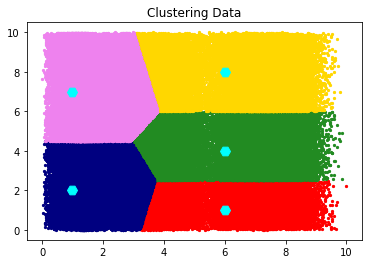

In [ ]:
fig, ax = plt.subplots()
color = ['red', 'forestgreen', 'navy', 'gold', 'violet', 'turquoise', 'grey']

for i in range(k):
        titik = np.array([arr[j] for j in range(len(arr)) if temparrcl[j] == i])
        x = titik[:, 0]
        y = titik[:, 1]
        ax.scatter(x, y, s=5, c=color[i])

x_clus = centroid[:, 0]
y_clus = centroid[:, 1]        
ax.scatter(x_clus, y_clus, marker='H', s=100, color='cyan')
plt.title("Clustering Data")
plt.show

Memastikan bahwa nilai centroid berubah

In [ ]:
print(centroid)

[[6 1]
 [6 4]
 [1 2]
 [6 8]
 [1 7]]


#EVALUASI

> Evaluasi menggunakan metode Elbow Menthod untung meninjau atau mengomparasi dari clustering sebelummnya sehingga mendapatkan hasil yang maksimum dimungkinkan



##Elbow menthod

metode untuk meninjau nilai k yang optimal dari hasil sebelumnnya

In [ ]:
datasetbaru

,x,y
0,-0.274482,-0.200329
1,0.513402,0.010798
2,0.037245,-0.320901
3,-0.353133,0.055236
4,-0.335913,0.233518
...,...,...
189694,-0.365450,0.222852
189695,-0.285205,-0.367017
189696,-0.253498,0.240691
189697,0.134709,0.405898


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


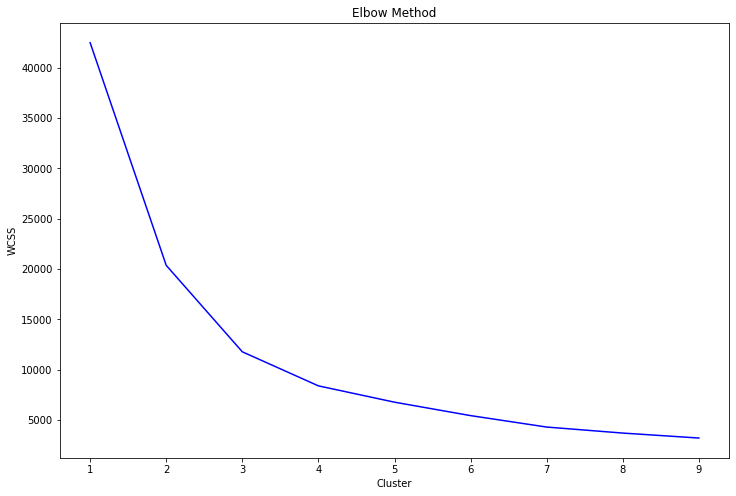

In [ ]:
wcss=[]

k = range(1,10)

for i in k:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=50)
    kmeans.fit(datasetbaru)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
sns.lineplot(range(1,10), wcss, markers='o', color='blue')
plt.title('Elbow Method')
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.show()